In [2]:
import sys
import networkx as nx
import numpy as np
import random
from collections import defaultdict
import torch
import math
import importlib


sys.path.insert(0, '../../')
import python_lib.graph_gen as graph_gen
import python_lib.models as models
#from python_lib import solvers



In [3]:
%matplotlib inline

# Curie Weiss

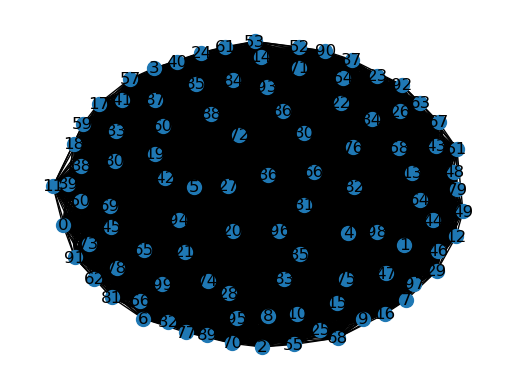

In [166]:
import importlib
import matplotlib.pyplot as plt

N = 100
fig, ax0 = plt.subplots(1,1)
J_interaction = torch.ones(N,N) - torch.eye(N, N)

inter_H = 0
H = inter_H * (torch.ones(N))

if N < 200:
    graph_gen.plot_matrix_graph(J_interaction, ax0)

J_val = 1/(2*N)
J = J_val * J_interaction

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

# Exact solutions
enumerating all configurations.

In [167]:
from python_lib.models import spins_model
importlib.reload(models)
device="cpu"
#device="mps"
CW_model = spins_model.model(N, H, J, J_interaction, device=device)
beta_fin=2.1
beta_init = 0.1
step = 0.05
betas = np.arange(beta_init, beta_fin, step)

In [168]:
CW_model_exact = spins_model.model(N, H, J, J_interaction, device="cpu")
f_exact = []
#for beta_ in betas:
#    f_exact.append(CW_model_exact.exact(beta_))


# Theoretical Values
at zero temperature
K0 S=-0.16 U=-0.798 
K1 S=-0.01 U=-0.7653 
K2 S=-0.004 U=-0.7636 

# Neural network solutions
## ordered case

In [169]:
from python_lib.nets import ann
importlib.reload(ann)
from python_lib.nets import simple_layer
importlib.reload(simple_layer)
bias = True
net2train = simple_layer.simple_layer(CW_model, bias, device=device)

Total number of trainable parameters: 10100


In [64]:
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net2train.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

step: 904 1.60 fe: -0.533 +- 0.00702 E: -0.335, S: 0.317, M: 0.03332

KeyboardInterrupt: 

In [170]:
from python_lib.nets import ann
importlib.reload(ann)
from python_lib.nets import list_nets
importlib.reload(list_nets)

one = list_nets.one_var
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.long()
dict_nets = {}
net2train = list_nets.list_nets(CW_model, one, input_mask, device=device, dict_nets=dict_nets)

In [171]:
import pandas as pd

lr = 0.001
max_step=1000
batch_size=2000
stats = []
all_Js = []
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )
    all_Js.append([list(l["params"])[0].data.detach().cpu().numpy()[0] for l in net2train.parameters()])
    stats.append(net2train.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

step: 0 2.05 fe: -0.507 +- 0.00060 E: -0.458, S: 0.100, M: 0.01989545

In [172]:
stats_pd

,beta,free_energy_mean,free_energy_std,entropy_mean,energy_mean,mag,mag_mean
0,0.10,-6.931310,0.007079,0.693144,0.000130,"[0.025, -0.014, -0.017, 0.037, 0.004, -0.02, 0...",0.01924
1,0.15,-4.621076,0.007990,0.693151,-0.000070,"[-0.01, -0.012, -0.061, -0.019, -0.034, 0.017,...",0.01777
2,0.20,-3.465583,0.007052,0.693130,0.000069,"[-0.017, 0.046, -0.006, -0.006, 0.009, 0.027, ...",0.01856
3,0.25,-2.772516,0.007452,0.693117,-0.000049,"[0.011, -0.028, 0.014, -0.026, -0.017, 0.022, ...",0.01747
4,0.30,-2.310210,0.006931,0.693098,0.000116,"[0.011, -0.008, -0.006, 0.022, -0.022, 0.02, -...",0.01740
5,0.35,-1.980368,0.007366,0.693056,-0.000208,"[-0.017, -0.015, -0.006, -0.01, -0.011, -0.015...",0.01985
6,0.40,-1.732705,0.007208,0.693109,0.000067,"[0.018, 0.022, -0.006, -0.006, 0.023, -0.005, ...",0.01901
7,0.45,-1.540264,0.007423,0.693045,-0.000165,"[0.023, 0.009, -0.012, 0.039, 0.019, -0.014, 0...",0.01868
8,0.50,-1.386057,0.006985,0.693069,0.000080,"[-0.053, 0.018, 0.029, 0.033, 0.014, -0.002, 0...",0.01808
9,0.55,-1.260143,0.007290,0.692973,-0.000193,"[-0.012, -0.011, -0.02, -0.004, -0.043, -0.033...",0.01963


<AxesSubplot:xlabel='beta'>

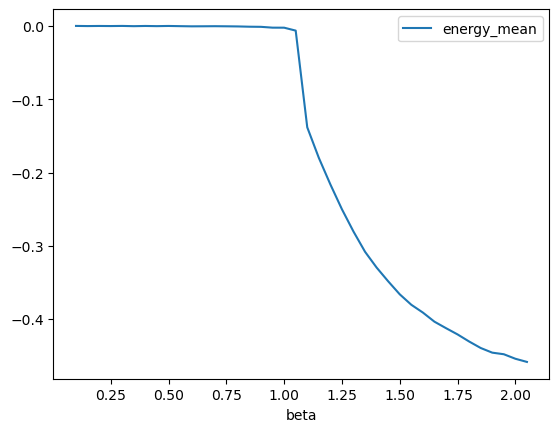

In [173]:
stats_pd.plot.line(x="beta", y="energy_mean")

In [174]:
all_Js = np.array(all_Js)

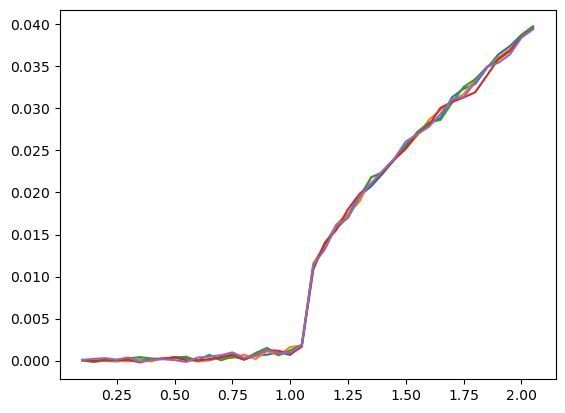

In [175]:
plt.plot(stats_pd["beta"], all_Js[:,2])
plt.plot(stats_pd["beta"], all_Js[:,3])
plt.plot(stats_pd["beta"], all_Js[:,4])
plt.plot(stats_pd["beta"], all_Js[:,5])
plt.plot(stats_pd["beta"], all_Js[:,19])

In [44]:
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
net2train = net
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ocadni/opt/anaconda3/envs/m1torch/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_3263/3421085256.py", line 9, in <cell line: 8>
    net2train.train(
  File "/Users/ocadni/git/pytorch_test/results/Curie-Weiss/../../python_lib/nets/ann.py", line 139, in train
    samples, x_hat = self.sample(batch_size)
  File "/Users/ocadni/git/pytorch_test/results/Curie-Weiss/../../python_lib/nets/list_nets.py", line 87, in sample
    input_x = x[:, mask_n_i]
IndexError: tensors used as indices must be long, byte or bool tensors

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ocadni/opt/anaconda3/envs/m1torch/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 1993, in showtraceback
    stb = self.Interactiv

In [52]:
from python_lib.nets import simplest
from python_lib.solvers import train_nn_anneal
importlib.reload(simplest)
importlib.reload(solvers)
bias = True
net_simplest = simplest.simplest(CW_model.N, CW_model, bias, device=device)

In [54]:
from python_lib.nets import one_var
importlib.reload(one_var)
bias = True
net_one_var = one_var.one_var(CW_model.N, CW_model, bias, device=device)

AttributeError: 'one_J_layer' object has no attribute 'weight'

In [51]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
net2train = net_one_var
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

AttributeError: 'one_var' object has no attribute 'params'

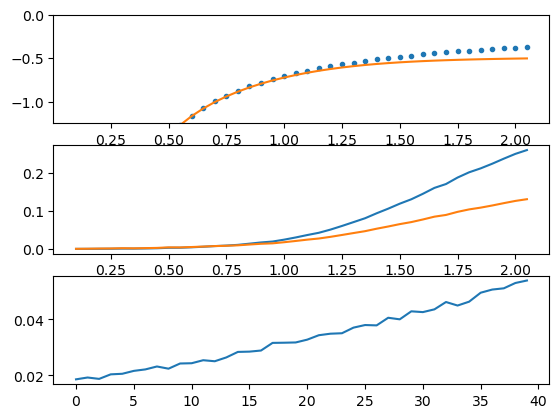

In [39]:
stats_pd_est = pd.DataFrame(stats)
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd_est["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,0.)

ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"])/np.abs(f_exact))
ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"]))
    
ax2.plot(stats_pd_est["free_energy_std"])

In [12]:
net_simplest.layer1.weight

/Users/ocadni/opt/anaconda3/envs/m1torch/lib/python3.10/site-packages/torch/_tensor_str.py:103: UserWarning: The operator 'aten::bitwise_and.Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at  /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1659484612588/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(tensor_view, torch.isfinite(tensor_view) & tensor_view.ne(0))


tensor([[0.0000, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250, 0.0250],
        [0.0250, 0.0000, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250, 0.0250],
        [0.0250, 0.0250, 0.0000, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250, 0.0250],
        [0.0250, 0.0250, 0.0250, 0.0000, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250, 0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0000, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250, 0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0000, 0.0

In [128]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=100
batch_size=2000
stats = train_nn_anneal(
    net, 
    np.full(100, 0.0001),
    lr=lr, 
    max_step=5,
    batch_size=batch_size)
stats = train_nn_anneal(
    net, 
    betas,
    lr=lr, 
    max_step=max_step,
    batch_size=batch_size)
stats_pd = pd.DataFrame(stats)

 0.00 fe: -6931.478 +- 1.66951 E: -0.004, S: 0.693, M: 0.020752

KeyboardInterrupt: 

In [ ]:
stats_pd = pd.DataFrame(stats)

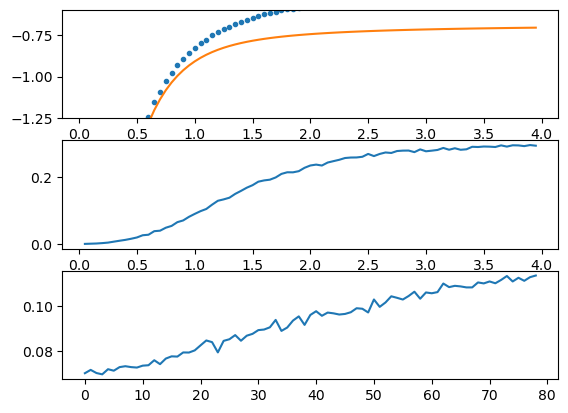

In [162]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"])/np.abs(f_exact))
    
ax2.plot(stats_pd["free_energy_std"])

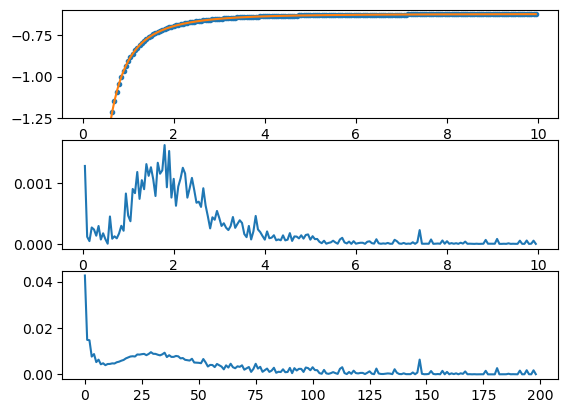

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"]))
    
ax2.plot(stats_pd["free_energy_std"])

In [ ]:
stats_pd.keys()

Index(['free_energy_mean', 'free_energy_std', 'entropy_mean', 'energy_mean',
       'mag', 'mag_mean'],
      dtype='object')

In [ ]:
stats_pd[stats_pd["beta"]==0.2]

KeyError: 'beta'

(-1.25, -0.7)

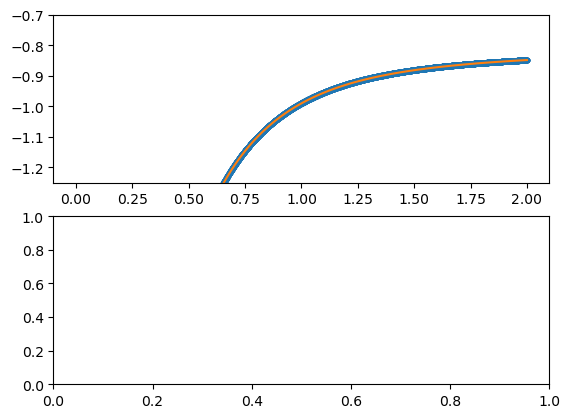

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(2,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(np.linspace(0.001,beta,100), f_exact)
ax0.set_ylim(-1.25,-0.7)

for b in np.linspace(0.001,beta,100):
    
err = [np.abs()]

In [ ]:
net.compute_stats(beta, batch_size=50000)

 10.00 fe: -0.739 +- 0.00870 E: -0.736, S: 0.027, M: 0.859

{'free_energy_mean': -0.7392186279296875,
 'free_energy_std': 0.008703468322753906,
 'entropy_mean': 0.027395074367523194,
 'energy_mean': -0.7364790344238281,
 'mag': array([ 0.85432   ,  0.85863996,  0.87307996,  0.35123998,  0.87483996,
         0.852     , -0.87583995,  0.87571996, -0.87588   , -0.87583995,
         0.87512   ,  0.87592   ,  0.8756    , -0.87579995, -0.87564   ,
        -0.87592   , -0.87567997, -0.87579995, -0.87579995,  0.87188   ,
         0.87588   , -0.87567997, -0.87583995,  0.87552   ,  0.876     ,
         0.87571996,  0.87324   ,  0.8752    ,  0.8678    ,  0.87531996,
         0.87404   , -0.87516   , -0.87592   ,  0.87376   , -0.87579995,
        -0.87531996,  0.87435997, -0.87347996, -0.87564   ,  0.87571996,
        -0.87575996, -0.87535995, -0.8756    , -0.87596   ,  0.87527996,
        -0.87583995, -0.87236   ,  0.87535995, -0.87548   , -0.81747997,
         0.8754    ,  0.87579995, -0.87531996,  0.77948   , -0.8756    ,
         0.87544   , -0.87504 

## random case

In [ ]:
from python_lib.nets import bp_nn
importlib.reload(bp_nn)

net_rand = bp_nn.bp_nn(tree_rand.N, tree_rand, True, z2=False, init_zero=False,)
                      
net_rand.train(beta=beta, lr=0.001, 
           max_step=1000,
               opt="adam")


 0.50 1000 fe: -1.902 +- 0.23193 E: -0.867, S: 0.518, M: 0.43, B1 = -0.282

{'free_energy_mean': tensor(-1.9021, dtype=torch.float64),
 'free_energy_std': tensor(0.2319, dtype=torch.float64),
 'entropy_mean': tensor(0.5177, dtype=torch.float64, grad_fn=<DivBackward0>),
 'energy_mean': tensor(-0.8667),
 'mag': tensor([-0.1280,  0.4300, -0.6520,  0.5400,  0.3780, -0.6060,  0.5060,  0.4020,
         -0.4160,  0.3300,  0.3100, -0.4540, -0.6080, -0.3740, -0.3180]),
 'mag_mean': tensor(0.4301)}

In [ ]:
net_rand.compute_stat_is(beta, batch_size=10000)


free_energy: -2.189,  std_fe: 0.00191, mag_mean: 0.082, entropy: 0.392 energy: -1.405

tensor(-2.1889, dtype=torch.float64)

# BP solution

In [ ]:
import bp_solver
importlib.reload(bp_solver)

bp_sol = bp_solver.BP_solver(tree_rand)

In [ ]:
beta

0.5

In [ ]:
bp_sol.converge(beta)

fe: -1.611, ener: -0.431, M: 0.000, iter 6
